# 회귀분석 팀플 분석
### 칼럼 설명
- Country_Region : kaggle Covid-19 에서 사용되는 지역 이름  
- Province_State : 중국의 홍콩, 마카오 요런 느낌(도, 주)  
- WorldBankName : World Bank 에서 사용하는 국가의 이름  
- Health_exp_pct_GDP_2016 : GDP의 백분율로 표현되는 현재 건강 지출 수준    
 > 매년 소비되는 의료 상품과 서비스 포함
- Health_exp_public_pct_2016 : 국내 공공 의료원으로부터 자금을 지원받은 현재 의료비 분담  
- **Health_exp_out_of_pocket_pct_2016 : 현재 총 의료비 지출의 현금 외 지불 분담.**   
- **Health_exp_per_capita_USD_2016 : 현재 미국 달러로 1인당 보건에 대한 지출(의료재화, 서비스 포함)**    
- **per_capita_exp_PPP_2016 : PPP(구매력 평가)에서 국제 달러로 표시되는 1인당 보건에 대한 현재 지출**  
- External_health_exp_pct_2016 : 외부 출처에서 자금을 조달한 현재 의료 지출의 몫     
- Completeness_of_birth_reg_2009-18 : 출생신고 완료율    
- Completeness_of_death_reg_2008-16 : 완전 사망 기준(사망자 추정 비율)  

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Health_systems.csv")
data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [2]:
data.columns

Index(['Country_Region', 'Province_State', 'World_Bank_Name',
       'Health_exp_pct_GDP_2016', 'Health_exp_public_pct_2016',
       'Health_exp_out_of_pocket_pct_2016', 'Health_exp_per_capita_USD_2016',
       'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016',
       'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16'],
      dtype='object')

In [3]:
data.shape

(210, 14)

In [4]:
data.isna().sum() # 결측,,,,,,,,

Country_Region                           23
Province_State                          196
World_Bank_Name                           0
Health_exp_pct_GDP_2016                  24
Health_exp_public_pct_2016               24
Health_exp_out_of_pocket_pct_2016        24
Health_exp_per_capita_USD_2016           24
per_capita_exp_PPP_2016                  24
External_health_exp_pct_2016             43
Physicians_per_1000_2009-18              21
Nurse_midwife_per_1000_2009-18           21
Specialist_surgical_per_1000_2008-18     35
Completeness_of_birth_reg_2009-18        47
Completeness_of_death_reg_2008-16       103
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

### 1. Health_exp_per_capita_USD_2016   
국내 공공 의료원으로부터 자금을 지원받은 현재 의료비 분담

In [6]:
# Health_exp_per_capita_USD_2016 : 미국 달러로 의료 지출액(연속)
data.Health_exp_per_capita_USD_2016.describe()

count     186.000000
mean     1037.004839
std      1712.592621
min        16.400000
25%        85.700000
50%       322.600000
75%      1059.800000
max      9869.700000
Name: Health_exp_per_capita_USD_2016, dtype: float64

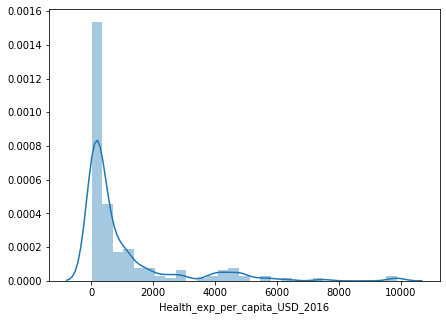

In [7]:
# 미국 달러 지출액 plot
f, ax = plt.subplots(figsize=(7,5)) 
sns.distplot(data['Health_exp_per_capita_USD_2016'])

In [8]:
# 왜도, 첨도 계산하기
print('Skewness(왜도) : %f' % data['Health_exp_per_capita_USD_2016'].skew()) 
print('Kurtosis(첨도) : %f' % data['Health_exp_per_capita_USD_2016'].kurt())

Skewness(왜도) : 2.712211
Kurtosis(첨도) : 8.346126


정규화가 필요해보인다! 연속형변수

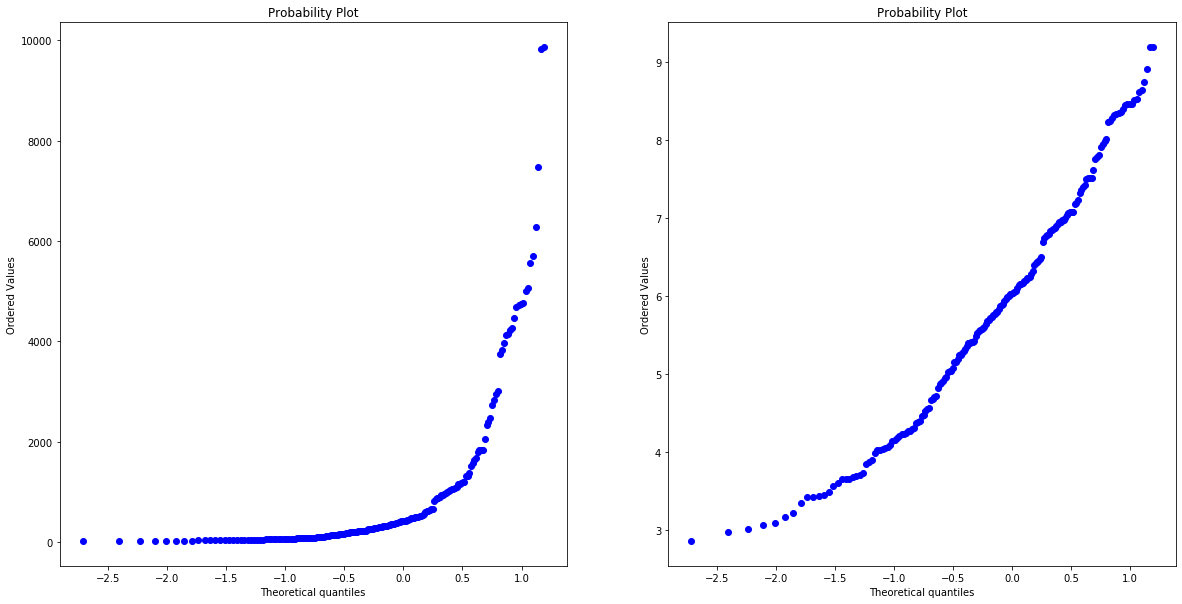

In [9]:
## QQ plot으로 정규성 검정

from scipy.stats import norm # 정규분포
from sklearn.preprocessing import StandardScaler
from scipy import stats  

fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
res = stats.probplot( data['Health_exp_per_capita_USD_2016'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(data['Health_exp_per_capita_USD_2016']), plot=plt)

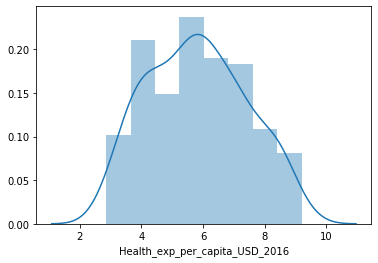

In [10]:
# 로그 취해서 정규화
data['Health_exp_per_capita_USD_2016'] = np.log1p(data['Health_exp_per_capita_USD_2016'])
f, ax = plt.subplots(figsize=(6,4))
sns.distplot(data['Health_exp_per_capita_USD_2016'])

### 2. Health_exp_out_of_pocket_pct_2016
현재 총 의료비 지출의 현금 외 지불 분담.

In [11]:
data.Health_exp_out_of_pocket_pct_2016.describe() # 비교적 분포 고름

count    186.000000
mean      32.661828
std       19.572777
min        0.100000
25%       16.200000
50%       30.100000
75%       44.825000
max       81.000000
Name: Health_exp_out_of_pocket_pct_2016, dtype: float64

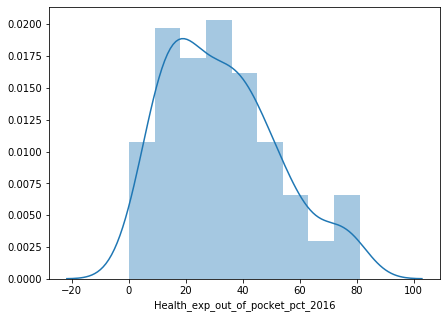

In [12]:
f, ax = plt.subplots(figsize=(7,5)) 
sns.distplot(data['Health_exp_out_of_pocket_pct_2016'])

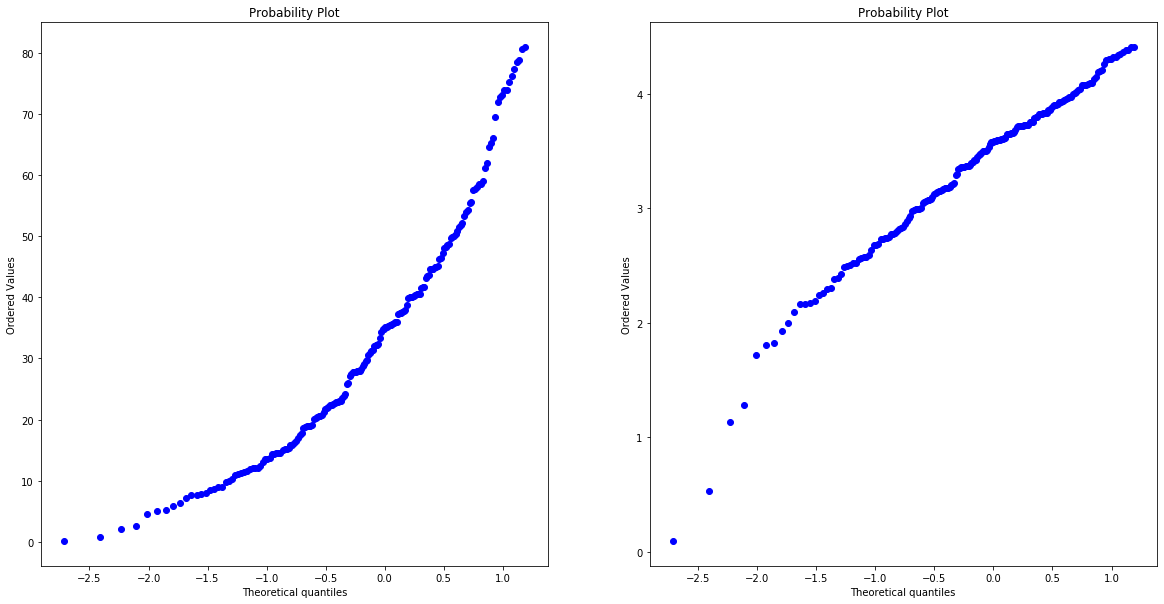

In [13]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
res = stats.probplot( data['Health_exp_out_of_pocket_pct_2016'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(data['Health_exp_out_of_pocket_pct_2016']), plot=plt)

로그정규화 하면 망함

### 3. per_capita_exp_PPP_2016 
PPP(구매력 평가)에서 국제 달러로 표시되는 1인당 보건에 대한 현재 지출

In [14]:
data.per_capita_exp_PPP_2016.describe()

count     186.000000
mean     1412.466667
std      1690.018939
min        29.900000
25%       231.500000
50%       782.500000
75%      1885.500000
max      9869.700000
Name: per_capita_exp_PPP_2016, dtype: float64

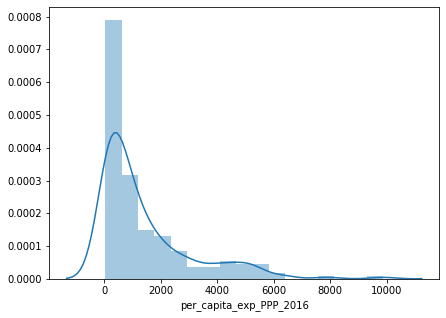

In [15]:
f, ax = plt.subplots(figsize=(7,5)) 
sns.distplot(data['per_capita_exp_PPP_2016']) # 불균형,,

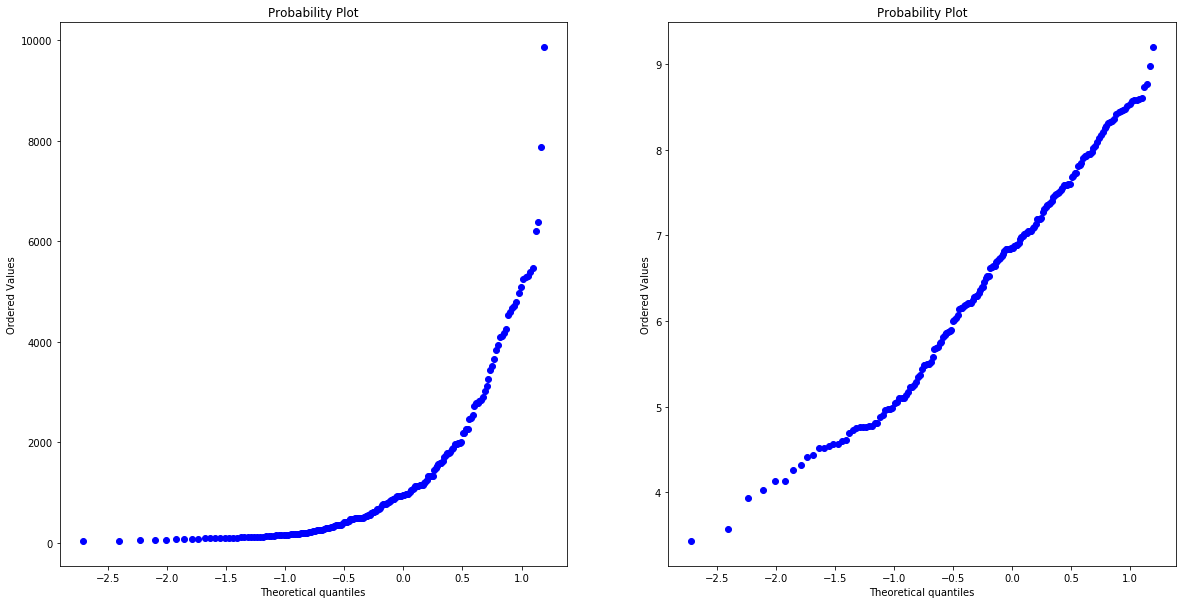

In [16]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
res = stats.probplot( data['per_capita_exp_PPP_2016'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(data['per_capita_exp_PPP_2016']), plot=plt)

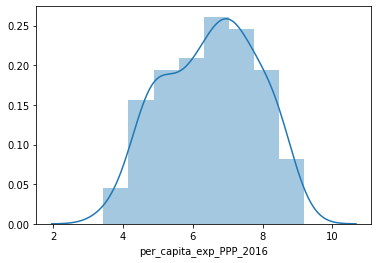

In [17]:
# 로그 취해서 정규화
data['per_capita_exp_PPP_2016'] = np.log1p(data['per_capita_exp_PPP_2016'])
f, ax = plt.subplots(figsize=(6,4))
sns.distplot(data['per_capita_exp_PPP_2016'])

In [18]:
data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,4.063885,5.098646,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,5.607639,6.634239,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,5.566052,6.906955,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,8.252107,8.513125,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,4.566429,5.230039,3.6,0.2,1.3,NaN,25.0,NaN


In [19]:
# Province_State 결측치를 Country_Region으로 채우기
data.Province_State.fillna(data['Country_Region'], inplace=True)
data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,Afghanistan,Afghanistan,10.2,5.1,77.4,4.063885,5.098646,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,Albania,Albania,6.7,41.4,58.0,5.607639,6.634239,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,Algeria,Algeria,6.6,67.7,30.9,5.566052,6.906955,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,Andorra,Andorra,10.4,49.1,41.7,8.252107,8.513125,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,Angola,Angola,2.9,44.1,35.2,4.566429,5.230039,3.6,0.2,1.3,NaN,25.0,NaN


### 외부 데이터 이용

In [20]:
train = pd.read_csv('train.csv') # 확진자수 데이터
pop = pd.read_csv('population.csv') # 인구, 인구밀도 데이터
pop.head(3)

,country,pop,tests,testpop,density,medianage,urbanpop,quarantine,schools,restrictions,...,sex0,sex14,sex25,sex54,sex64,sex65plus,sexratio,lung,femalelung,malelung
0,Afghanistan,"38,928,346",NaN,NaN,60.0,18.0,25.0,NaN,NaN,NaN,...,1.05,1.03,1.03,1.03,0.97,0.85,1.03,37.62,36.31,39.33
1,Albania,"2,877,797",NaN,NaN,105.0,36.0,63.0,NaN,NaN,NaN,...,1.08,1.11,1.09,0.93,0.95,0.87,0.98,11.67,7.02,17.04
2,Algeria,"43,851,044",NaN,NaN,18.0,29.0,73.0,NaN,NaN,NaN,...,1.05,1.05,1.05,1.03,1.01,0.89,1.03,8.77,5.03,12.81


In [21]:
# 전처리
pop.isna().sum()

country           0
pop              55
tests           167
testpop         167
density          55
medianage        55
urbanpop         55
quarantine      191
schools         155
restrictions    169
hospibed         55
smokers         111
sex0             61
sex14            61
sex25            61
sex54            61
sex64            61
sex65plus        61
sexratio         62
lung             74
femalelung       75
malelung         76
dtype: int64

In [22]:
pop['pop'] = pop['pop'].str.replace(",", "").astype('float64')

In [23]:
pop.shape # 왜 이게 9개 더 많냐?

(219, 22)

In [24]:
train.head(3)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0


In [25]:
# 전처리
train.isna().sum()

Id                    0
Province_State    20700
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [26]:
train['Date'] = pd.to_datetime(train.Date)
train['country_province'] = train['Province_State']
train.country_province.fillna(train['Country_Region'], inplace=True) # 결측치 채움

In [27]:
# train 데이터에 사이드 인포메이션 삽입(merge)
train = train.merge(pop, how='left', left_on = ['country_province'], right_on=['country'])
train = train.merge(data, how='left', left_on=["Country_Region", "Province_State"], right_on = ["Country_Region", "Province_State"])
train["days"] = (train.Date - train.Date[0]).dt.days
train.head(3)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country_province,country,pop,tests,...,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,days
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan,Afghanistan,38928346.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan,Afghanistan,38928346.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan,Afghanistan,38928346.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [28]:
# 나라 이름 라벨인코딩

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['country_province'] = lb.fit_transform(train.country_province)

In [29]:
train.tail(3)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country_province,country,pop,tests,...,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,days
35992,35993,NaN,Zimbabwe,2020-05-13,37.0,4.0,311,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112
35993,35994,NaN,Zimbabwe,2020-05-14,37.0,4.0,311,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113
35994,35995,NaN,Zimbabwe,2020-05-15,42.0,4.0,311,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114


In [30]:
train.columns # 나중에 여기서 중요도 뽑을거임

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities', 'country_province', 'country', 'pop', 'tests', 'testpop',
       'density', 'medianage', 'urbanpop', 'quarantine', 'schools',
       'restrictions', 'hospibed', 'smokers', 'sex0', 'sex14', 'sex25',
       'sex54', 'sex64', 'sex65plus', 'sexratio', 'lung', 'femalelung',
       'malelung', 'World_Bank_Name', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16', 'days'],
      dtype='object')

In [31]:
# 중요 칼럼만 추리기
train = train[['country_province', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities', 'pop', 'density', 'lung', 'femalelung',
       'malelung', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16', 'days']]

In [32]:
train.head(3)

,country_province,Country_Region,Date,ConfirmedCases,Fatalities,pop,density,lung,femalelung,malelung,...,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,days
0,0,Afghanistan,2020-01-22,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,Afghanistan,2020-01-23,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0,Afghanistan,2020-01-24,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## test 데이터셋 전처리

In [33]:
# test 데이터셋
test= pd.read_csv('health_test.csv')
test.head(3)

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04


In [34]:
test['Date'] = pd.to_datetime(test.Date)
test['country_province'] = test['Province_State']
test.country_province.fillna(test['Country_Region'], inplace=True) # 결측치 채움

# test 데이터에 사이드 인포메이션 삽입(merge)
test = test.merge(pop, how='left', left_on = ['country_province'], right_on=['country'])
test = test.merge(data, how='left', left_on=["Country_Region", "Province_State"], right_on = ["Country_Region", "Province_State"])
test["days"] = (test.Date - test.Date[0]).dt.days
test.head(3)

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
test['country_province'] = lb.fit_transform(test.country_province)

In [35]:
test.columns

Index(['ForecastId', 'Province_State', 'Country_Region', 'Date',
       'country_province', 'country', 'pop', 'tests', 'testpop', 'density',
       'medianage', 'urbanpop', 'quarantine', 'schools', 'restrictions',
       'hospibed', 'smokers', 'sex0', 'sex14', 'sex25', 'sex54', 'sex64',
       'sex65plus', 'sexratio', 'lung', 'femalelung', 'malelung',
       'World_Bank_Name', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16', 'days'],
      dtype='object')

In [36]:
# Confirmed case 는 없음!
test = test[['country_province', 'Country_Region', 'Date',
       'pop', 'density', 'lung', 'femalelung',
       'malelung', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_1000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16', 'days']]

In [37]:
test.head(3)

,country_province,Country_Region,Date,pop,density,lung,femalelung,malelung,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,days
0,0,Afghanistan,2020-04-02,38928346.0,60.0,37.62,36.31,39.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,Afghanistan,2020-04-03,38928346.0,60.0,37.62,36.31,39.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0,Afghanistan,2020-04-04,38928346.0,60.0,37.62,36.31,39.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [38]:
train.head(3)

,country_province,Country_Region,Date,ConfirmedCases,Fatalities,pop,density,lung,femalelung,malelung,...,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,days
0,0,Afghanistan,2020-01-22,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,Afghanistan,2020-01-23,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0,Afghanistan,2020-01-24,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [39]:
print(train.shape, test.shape) # 확진자수와 facility예측

(35995, 22) (13459, 20)


In [40]:
train["days_from_first_case"] = 0
test["days_from_first_case"] = 0
train["days_from_first_death"] = 0
train["days_from_case_100"] = 0
test["days_from_case_100"] = 0
test["days_from_first_death"] = 0

dates = list(train.Date.unique())
for province in train.country_province.unique():
    #print(province)
    mask1 = train.country_province == province
    mask2 = train.ConfirmedCases > 1.0
    mask3 = train.ConfirmedCases > 100.0
    mask4 = train.Fatalities > 1.0
    try:
        idx1 = train.loc[mask1 & mask2 ,["ConfirmedCases"]].idxmin()[0]
        dateidx1 = train.iloc[idx1]["Date"]
    except:
        dateidx1 = test.Date.max()
        pass
    #print(dateidx1)
    train.loc[mask1 & (train.Date >= dateidx1), "days_from_first_case"] = (train.Date - dateidx1).dt.days
    test.loc[mask1 & (test.Date >= dateidx1), "days_from_first_case"] = (test.Date - dateidx1).dt.days
    
    try:
        idx1 = train.loc[mask1 & mask3 ,["ConfirmedCases"]].idxmin()[0]
        dateidx1 = train.iloc[idx1]["Date"]
    except:
        dateidx1 = test.Date.max()
        pass
    train.loc[mask1 & (train.Date >= dateidx1), "days_from_case_100"] = (train.Date - dateidx1).dt.days
    test.loc[mask1 & (test.Date >= dateidx1), "days_from_case_100"] = (test.Date - dateidx1).dt.days    

        
    try:
        idx1 = train.loc[mask1 & mask4 ,["Fatalities"]].idxmin()[0]
        dateidx1 = train.iloc[idx1]["Date"]
    except:
        dateidx1 = test.Date.max()
        pass
    train.loc[mask1 & (train.Date >= dateidx1), "days_from_first_death"] = (train.Date - dateidx1).dt.days
    test.loc[mask1 & (test.Date >= dateidx1), "days_from_first_death"] = (test.Date - dateidx1).dt.days    

In [41]:
# 결측 그냥 0으로 채움;;
train.fillna(value = 0, inplace = True)
test.fillna(value = 0, inplace = True)  

In [42]:
train.head(2)

,country_province,Country_Region,Date,ConfirmedCases,Fatalities,pop,density,lung,femalelung,malelung,...,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,days,days_from_first_case,days_from_first_death,days_from_case_100
0,0,Afghanistan,2020-01-22,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,Afghanistan,2020-01-23,0.0,0.0,38928346.0,60.0,37.62,36.31,39.33,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


In [43]:
test.head(2)

,country_province,Country_Region,Date,pop,density,lung,femalelung,malelung,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,...,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,days,days_from_first_case,days_from_case_100,days_from_first_death
0,0,Afghanistan,2020-04-02,38928346.0,60.0,37.62,36.31,39.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,25,6,8
1,0,Afghanistan,2020-04-03,38928346.0,60.0,37.62,36.31,39.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,26,7,9


In [44]:
result_columns = ['ConfirmedCases', 'Fatalities']
print(train.loc[train.Date.isin(test.Date.unique()), "Date"].unique())

sep_date = train.loc[train.Date.isin(test.Date.unique()), "Date"].unique().min()

['2020-04-02T00:00:00.000000000' '2020-04-03T00:00:00.000000000'
 '2020-04-04T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-04-07T00:00:00.000000000'
 '2020-04-08T00:00:00.000000000' '2020-04-09T00:00:00.000000000'
 '2020-04-10T00:00:00.000000000' '2020-04-11T00:00:00.000000000'
 '2020-04-12T00:00:00.000000000' '2020-04-13T00:00:00.000000000'
 '2020-04-14T00:00:00.000000000' '2020-04-15T00:00:00.000000000'
 '2020-04-16T00:00:00.000000000' '2020-04-17T00:00:00.000000000'
 '2020-04-18T00:00:00.000000000' '2020-04-19T00:00:00.000000000'
 '2020-04-20T00:00:00.000000000' '2020-04-21T00:00:00.000000000'
 '2020-04-22T00:00:00.000000000' '2020-04-23T00:00:00.000000000'
 '2020-04-24T00:00:00.000000000' '2020-04-25T00:00:00.000000000'
 '2020-04-26T00:00:00.000000000' '2020-04-27T00:00:00.000000000'
 '2020-04-28T00:00:00.000000000' '2020-04-29T00:00:00.000000000'
 '2020-04-30T00:00:00.000000000' '2020-05-01T00:00:00.000000000'
 '2020-05-02T00:00:00.000

In [45]:
# train, test set 구성

X_train = train.loc[(train.Date<sep_date),].drop(columns = ["Date", "Country_Region"] + result_columns)
y_train_cases = train.loc[(train.Date<sep_date),].ConfirmedCases
y_train_fatalities = train.loc[(train.Date<sep_date),].Fatalities

X_val = train.loc[(train.Date>=sep_date),].drop(columns = ["Date", "Country_Region"] + result_columns)
y_val_cases = train.loc[(train.Date>=sep_date),].ConfirmedCases
y_val_fatalities = train.loc[(train.Date>=sep_date),].Fatalities

X_test = test.drop(columns =["Date", "Country_Region"])

In [46]:
print(X_train.shape, X_val.shape, X_test.shape)

(22223, 21) (13772, 21) (13459, 21)


In [47]:
#RMSE 규정

from sklearn.metrics import mean_squared_error
def validate_models(model_cases, model_fatalities):
    predict_train_cases = model_cases.predict(X_train)
    predict_val_cases = model_cases.predict(X_val)
    print("RMSE in train detected cases: ", np.sqrt(mean_squared_error(y_train_cases, predict_train_cases)))
    print("RMSE in validation detected cases: ", np.sqrt(mean_squared_error(y_val_cases, predict_val_cases)))
    predict_train_fatalities = model_fatalities.predict(X_train)
    predict_val_fatalities = model_fatalities.predict(X_val)
    print("RMSE in train fatalities: ", np.sqrt(mean_squared_error(y_train_fatalities, predict_train_fatalities)))
    print("RMSE in validation fatalities: ", np.sqrt(mean_squared_error(y_val_fatalities, predict_val_fatalities)))

## 모델링

In [48]:
# 회귀 모델링

from sklearn.linear_model import LinearRegression
lm_cases = LinearRegression()
lm_cases.fit(X_train, y_train_cases)

lm_fatalities = LinearRegression()
lm_fatalities.fit(X_train, y_train_fatalities)

validate_models(lm_cases, lm_fatalities)

RMSE in train detected cases:  4228.202981339912
RMSE in validation detected cases:  28261.918480444732
RMSE in train fatalities:  286.6106577497591
RMSE in validation fatalities:  2852.4900884752547


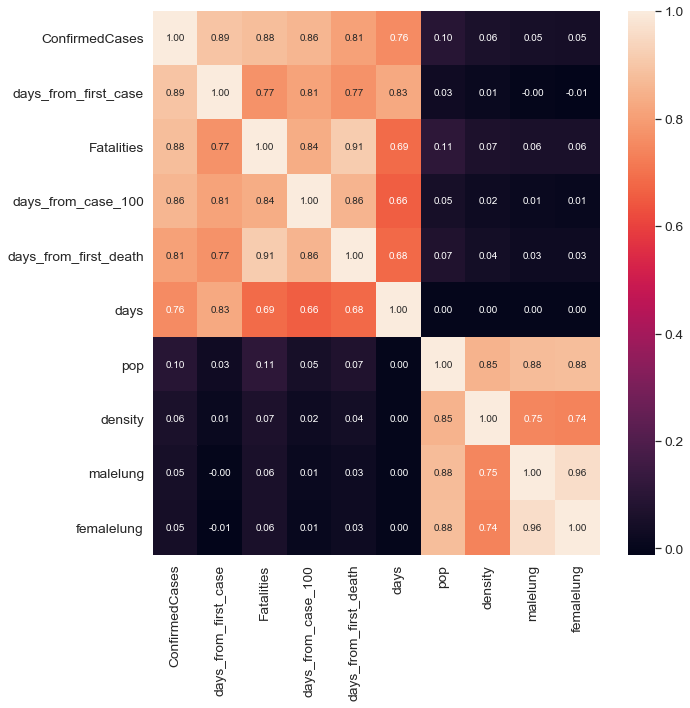

In [49]:
# 스피어만 상관계수 
# 'ConfirmedCases', 'Fatalities'
import scipy as sp 
cor_abs = abs(train.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=10, columns='ConfirmedCases').index
cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0]
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, annot_kws={'size':10}, 
            xticklabels=cor_cols.values, yticklabels=cor_cols.values)

나 안해 나 안해 나 안해 나 안해 진짜 장난하냐????????????????나 안해;;;;;;;

In [50]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_cases = RandomForestRegressor(n_estimators= 400, max_depth=6, random_state=0, verbose=0, n_jobs=-1)
rf_cases.fit(X_train, y_train_cases)

rf_fatalities = RandomForestRegressor(n_estimators= 400, max_depth=6, random_state=0, verbose=0, n_jobs=-1)
rf_fatalities.fit(X_train, y_train_fatalities)

validate_models(rf_cases, rf_fatalities)

RMSE in train detected cases:  1001.1851101356687
RMSE in validation detected cases:  26925.66544113003
RMSE in train fatalities:  60.60868752920965
RMSE in validation fatalities:  4373.5417935060395


오 뭐야 줄었어;;;;

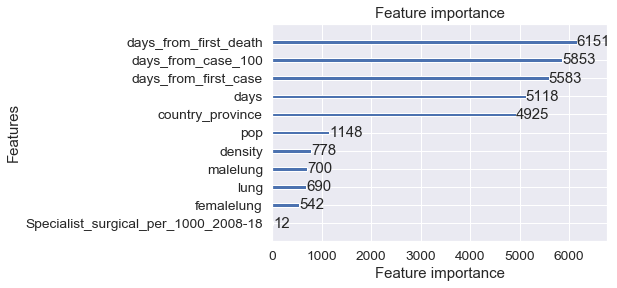

In [52]:
lgb.plot_importance(lgbm_fatalities)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [53]:
lag_number = 3
for lag in range(1, lag_number + 1):
    var_name = "cases_lag%d" % lag
    train[var_name] = train.ConfirmedCases.shift(periods = lag)
    train.loc[train.Date <= train.Date[lag - 1] , var_name] = 0
    var_name = "fatalities_lag%d" % lag
    train[var_name] = train.Fatalities.shift(periods = 1)
    train.loc[train.Date <= train.Date[lag - 1] , var_name] = 0

In [58]:
# rmse 비교
validate_models(lm_cases, lm_fatalities)
print("------------------")
validate_models(rf_cases, rf_fatalities)
print("------------------")
validate_models(lgbm_cases, lgbm_fatalities)

RMSE in train detected cases:  4228.202981339912
RMSE in validation detected cases:  28261.918480444732
RMSE in train fatalities:  286.6106577497591
RMSE in validation fatalities:  2852.4900884752547
------------------
RMSE in train detected cases:  1001.1851101356685
RMSE in validation detected cases:  26925.66544113003
RMSE in train fatalities:  60.60868752920965
RMSE in validation fatalities:  4373.5417935060395
------------------
RMSE in train detected cases:  54.44896317384946
RMSE in validation detected cases:  31438.155176089625
RMSE in train fatalities:  1.7508702710437054
RMSE in validation fatalities:  3397.971701879728


나 안해 안해 안해 안해 안해 안해 안해